# Name: Satyaraja Dasara
# Email: sdasara95@gmail.com

# <a href='https://www.linkedin.com/in/sdasara95/'><i class="fa fa-linkedin" aria-hidden="true"></i></a> <a href='https://github.com/sdasara95' ><i class="fa fa-github" style="color:black" aria-hidden="true"></i></a> <a href='https://sdasara95.github.io/' ><i class="fa fa-rss" aria-hidden="true" style="color:orange"></i></a>

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Satyaraja_Dasara_Klaviyo.ipynb',
 'screening_exercise_orders_v201810.csv']

In [3]:
file_name = 'screening_exercise_orders_v201810.csv'
data = pd.read_csv(file_name)

In [4]:
data.head(10)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


### A) Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)

Sort the dataframe by customer_id ascending and display the first 10 rows.

In [5]:
df_a = data.copy()
df_a.drop(['predicted_gender'],axis=1,inplace=True)
df_a.columns = ['customer_id','gender','most_recent_order_date','order_count']
df_a['most_recent_order_date'] = pd.to_datetime(df_a['most_recent_order_date'])
df_a = df_a.sort_values("most_recent_order_date").groupby('customer_id').tail(1)
df_a = df_a.sort_values('customer_id')
df_a.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,198.50
1,1001,0,2017-01-01 00:29:56,338.00
1742,1002,1,2017-02-19 21:35:31,176.00
4323,1003,1,2017-04-26 02:37:20,704.00
4,1004,0,2017-01-01 03:11:54,508.00
12953,1005,1,2017-12-16 01:39:27,120.60
4798,1006,1,2017-05-09 15:27:20,1012.54
7,1007,0,2017-01-01 15:59:50,168.00
12991,1008,0,2017-12-17 05:47:48,219.60
9,1009,1,2017-01-01 19:27:17,283.00


### B) Plot the count of orders per week for the store.

In [7]:
df_b = data.copy()
df_b.drop(['predicted_gender'],axis=1,inplace=True)
df_b.columns = ['customer_id','gender','most_recent_order_date','order_count']
df_b['most_recent_order_date'] = pd.to_datetime(df_b['most_recent_order_date'])
# We ignore the starting partial week as per ISO convention
orders_per_week = df_b.groupby(df_b.most_recent_order_date.dt.strftime('%V')).order_count.sum().to_numpy()
weeks = [i for i in range(1,53)]
plot_data = {'Weeks':weeks, 'Count of orders':orders_per_week} 
plot_df = pd.DataFrame(plot_data)

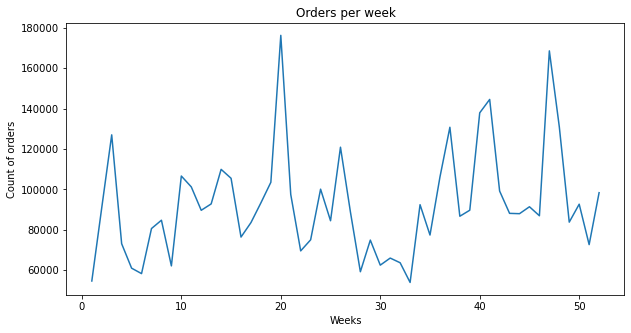

In [8]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x='Weeks',y='Count of orders',data= plot_df)
ax.set_title('Orders per week')
plt.show(ax)

### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

In [9]:
orders_0 = data[data.gender.eq(0)]['value'].to_numpy()
orders_1= data[data.gender.eq(1)]['value'].to_numpy()
N_0 = len(orders_0)
N_1 = len(orders_1)

In [10]:
mean_0 = np.mean(orders_0)
mean_1 = np.mean(orders_1)

print('Mean order value for\033[1m gender 0 \033[0mis\033[1m {:0.2f} \033[0m'.format(mean_0))
print('Mean order value for\033[1m gender 1 \033[0mis\033[1m {:0.2f} \033[0m'.format(mean_1))

Mean order value for gender 0 is 363.89 
Mean order value for gender 1 is 350.71 


In [11]:
skewness_0 = stats.skew(orders_0, axis=0, bias=True)
print('Skewness for gender 0 is {:0.2f}'.format(skewness_0))

Skewness for gender 0 is 4.41


In [12]:
skewness_1 = stats.skew(orders_1, axis=0, bias=True)
print('Skewness for gender 1 is {:0.2f}'.format(skewness_1))

Skewness for gender 1 is 4.91


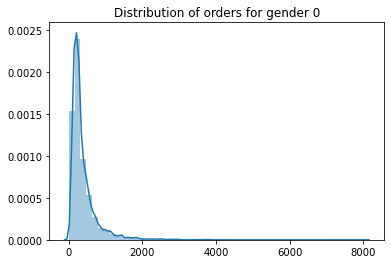

In [13]:
chart = sns.distplot(orders_0)
chart.set_title('Distribution of orders for gender 0')
plt.show(chart)

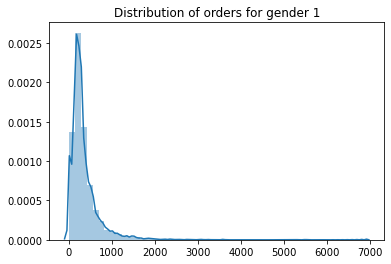

In [14]:
chart = sns.distplot(orders_1)
chart.set_title('Distribution of orders for gender 1')
plt.show(chart)

**Both seem like log normal distributions with skewness to the right.<br>
We can do a log transform and check the distributions.**

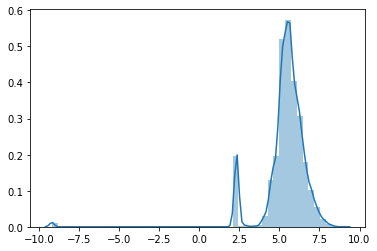

In [15]:
new0 = np.array([np.log(i+10e-5) for i in orders_0])
a = sns.distplot(new0)
plt.show(a)

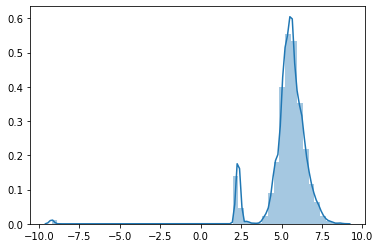

In [16]:
new1 = np.array([np.log(i+10e-5) for i in orders_1])
a = sns.distplot(new1)
plt.show(a)

**The distributions don't look completely normal.<br>
Let's plot a QQ-Plot and verify the normality.**

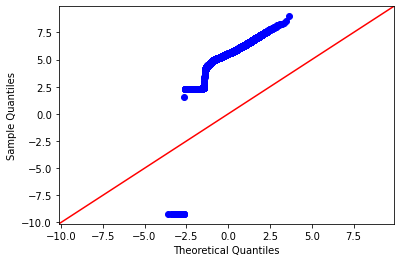

In [17]:
sm.qqplot(new0, line ='45') 
plt.show()

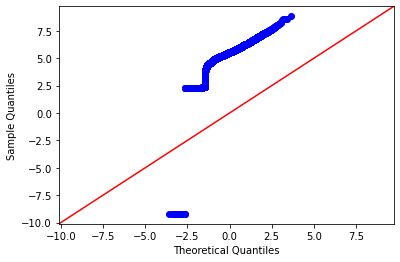

In [18]:
sm.qqplot(new1, line ='45') 
plt.show()

**It looks like the distributions aren't normal. <br>
The distributions look multimodal/bi-modal.**

In [19]:
print(f'Number of samples with gender 0 is {N_0}')
print(f'Number of samples with gender 1 is {N_1}')

Number of samples with gender 0 is 6759
Number of samples with gender 1 is 6712


**Assume null hypothesis that both the groups have equal variance and conduct Levene test**

In [20]:
l_stat,levene_pvalue = stats.levene(orders_0,orders_1)
print(f'The p-value for Levene test is {levene_pvalue}')

The p-value for Levene test is 0.018782230716425024


**Since p-value is lesser than 5% we reject the null hypothesis that the two groups have equal variances**

**We have large number of samples so we can do Welch t-test as it's robust to assumption of normality of data. <br>
 As per Levene test we can't assume equal variance for both groups. <br>
 We'll do indpendent Welch t-test for unequal variances between the two groups.<br>**

In [21]:
t_stat, p_val = stats.ttest_ind(a=orders_0, b=orders_1, equal_var=False, nan_policy='omit')

In [22]:
print(f'Welch t-test P-value is {p_val}')

Welch t-test P-value is 0.04816296295128402


**Since obtained p-value is lesser than alpha=0.05 we can reject the Null hypothesis that the means are equal. <br>
The difference in means seems to be statistically different.**

In [23]:
u_stat, p_val = stats.mannwhitneyu(orders_0, orders_1)

In [24]:
print(f'Mann Whitney U-test P-value is {p_val}')

Mann Whitney U-test P-value is 0.15220525508505944


**As per Mann Whitney U-test we can conclude that both the groups belong to the same distribution**

### D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [25]:
from sklearn.metrics import confusion_matrix
y = data['gender'].to_numpy()
y_pred = data['predicted_gender'].to_numpy()
cf_matrix = confusion_matrix(y, y_pred)

In [26]:
tn, fp, fn, tp = cf_matrix.ravel()

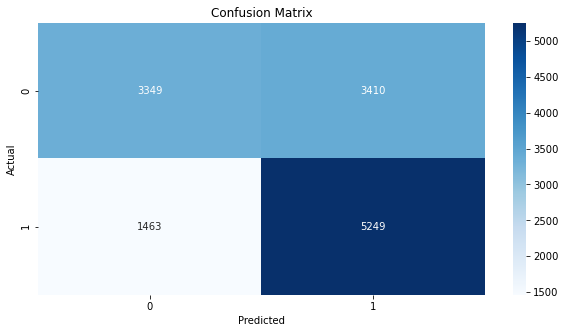

In [27]:
plt.figure(figsize=(10,5))
g = sns.heatmap(cf_matrix, annot=True,fmt='d',cmap='Blues')
g.set_title('Confusion Matrix')
g.set_xlabel('Predicted')
g.set_ylabel('Actual')
plt.show()

In [28]:
print('Number of gender 0 is {}'.format(len(y[y==0])))
print('Number of gender 1 is {}'.format(len(y[y==1])))

Number of gender 0 is 6759
Number of gender 1 is 6712


**Since there is no class imbalance and we want to maximize correct predictions for both the classes as they both generate roughly equal revenue, <br>
Accuracy is a good metric in this case. <br>
True positives and true negatives are important in this case.**

In [29]:
acc = (tp+tn)/(tp+tn+fp+fn)
# sensitivity = tp/(tp+fn)
# specificity = tn/(tn+fp)
print('Accuracy is {:0.2f}'.format(acc))

Accuracy is 0.64


### E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.